<a href="https://colab.research.google.com/github/Cesarso/Python-para-DataScience/blob/main/Pandas_IO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CRIANDO OS NOMES

In [317]:
import pandas as pd


In [318]:
nomes_f = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking/?qtd=200&sexo=f")

In [319]:
nomes_m = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking/?qtd=200&sexo=m")

In [320]:
nomes_f


,nome,regiao,freq,rank,sexo
0,MARIA,0,11694738,1,F
1,ANA,0,3079729,2,F
2,FRANCISCA,0,721637,3,F
3,ANTONIA,0,588783,4,F
4,ADRIANA,0,565621,5,F
...,...,...,...,...,...
195,ROSANE,0,82203,196,F
196,IVONETE,0,81878,197,F
197,LUCIANE,0,81230,198,F
198,ISADORA,0,81100,199,F


In [321]:
nomes_m

,nome,regiao,freq,rank,sexo
0,JOSE,0,5732508,1,M
1,JOAO,0,2971935,2,M
2,ANTONIO,0,2567494,3,M
3,FRANCISCO,0,1765197,4,M
4,CARLOS,0,1483121,5,M
...,...,...,...,...,...
195,WALTER,0,67207,196,M
196,ARLINDO,0,66669,197,M
197,MICHAEL,0,65736,198,M
198,ALVARO,0,65444,199,M


In [322]:
print("Quantidade de nomes: " + str(len(nomes_f) + len(nomes_m)))

Quantidade de nomes: 400


In [323]:
frames = [nomes_f, nomes_m]  # a variavel frame recebe a lista de nomes como um DataFrame

In [324]:
nomes = pd.concat(frames)['nome'].to_frame() #concatenando os frames escolhendo somente a coluna nomes

In [325]:
nomes.sample(5) # sample pega nomes aleatorios da lista

,nome
142,RAISSA
47,LUCIA
156,VALDEMAR
167,TAINARA
197,MICHAEL


# INCLUINDO ID DOS ALUNOS

In [326]:
import numpy as np
np.random.seed(123) # Gera um Nº aleatorio a partir desse numero

In [327]:
total_alunos = len(nomes)
total_alunos

400

In [328]:
nomes["id_aluno"] = np.random.permutation(total_alunos) + 1

In [329]:
nomes.sample(5)

,nome,id_aluno
188,POLIANA,369
57,DAIANE,303
3,FRANCISCO,382
182,CHARLES,33
30,ANDERSON,111


In [330]:
dominios = ['@dominioemail.com.br', '@servicodoemail.com']
nomes['dominio'] = np.random.choice(dominios, total_alunos)

In [331]:
nomes.sample(5)

,nome,id_aluno,dominio
84,SEVERINO,78,@dominioemail.com.br
0,JOSE,331,@servicodoemail.com
179,IAGO,340,@dominioemail.com.br
10,SANDRA,174,@dominioemail.com.br
171,TERESINHA,45,@dominioemail.com.br


In [332]:
nomes['email'] = nomes.nome.str.cat(nomes.dominio).str.lower()

In [333]:
nomes.sample(5)

,nome,id_aluno,dominio,email
114,ARTHUR,320,@dominioemail.com.br,arthur@dominioemail.com.br
57,DAIANE,303,@servicodoemail.com,daiane@servicodoemail.com
85,HELENA,221,@dominioemail.com.br,helena@dominioemail.com.br
183,IRACI,8,@dominioemail.com.br,iraci@dominioemail.com.br
189,DALVA,137,@dominioemail.com.br,dalva@dominioemail.com.br


# CRIANDO A TABELA CURSOS

In [334]:
!pip3 install html5lib
!pip3 install lxml

In [335]:
import html5lib

In [336]:
url = 'http://tabela-cursos.herokuapp.com/index.html'

cursos = pd.read_html(url)

In [337]:
cursos

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [338]:
type(cursos)

list

In [339]:
cursos = cursos[0]

In [340]:
type(cursos)

pandas.core.frame.DataFrame

In [341]:
cursos.head()

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


# ALTERANDO O INDEX

In [363]:
cursos.rename(columns = {'Nome do curso' : 'Nome_curso'})

,Nome_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python
6,PHP com MySql
7,.NET para web
8,Novas integrações com Java
9,TDD com Java


In [364]:
cursos.head(5)

,Nome do curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


In [344]:
cursos['id'] = cursos.index + 1

In [345]:
cursos.head()

,Nome do curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5


In [346]:
cursos = cursos.set_index('id')

In [347]:
cursos.head()

,Nome do curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


In [348]:
nomes.sample(5)

,nome,id_aluno,dominio,email
59,ISABEL,83,@dominioemail.com.br,isabel@dominioemail.com.br
172,REBECA,165,@servicodoemail.com,rebeca@servicodoemail.com
130,JUNIOR,184,@dominioemail.com.br,junior@dominioemail.com.br
70,JOAQUIM,248,@servicodoemail.com,joaquim@servicodoemail.com
171,VALDEMIR,3,@dominioemail.com.br,valdemir@dominioemail.com.br


# MATRICULANDO OS ALUNOS NOS CURSOS

In [349]:
nomes.sample(5)

,nome,id_aluno,dominio,email
189,DALVA,137,@dominioemail.com.br,dalva@dominioemail.com.br
144,VINICIOS,147,@servicodoemail.com,vinicios@servicodoemail.com
69,TEREZA,151,@servicodoemail.com,tereza@servicodoemail.com
105,PABLO,141,@dominioemail.com.br,pablo@dominioemail.com.br
109,CELSO,266,@servicodoemail.com,celso@servicodoemail.com


In [350]:
nomes['matriculas'] = np.ceil(np.random.exponential(size=total_alunos) * 1.5).astype(int) #A funçao ceil arredonda pra cima. O nº random mutiplica por 1.5 para aumentar o num de cursos. O converte para int

In [351]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
15,LETICIA,347,@dominioemail.com.br,leticia@dominioemail.com.br,2
157,JAIME,214,@servicodoemail.com,jaime@servicodoemail.com,1
36,ROBERTO,364,@dominioemail.com.br,roberto@dominioemail.com.br,2
91,CELIA,367,@dominioemail.com.br,celia@dominioemail.com.br,2
183,MARLON,74,@servicodoemail.com,marlon@servicodoemail.com,1


In [352]:
nomes.matriculas.describe() #dados estatistico do frame

count    400.000000
mean       2.110000
std        1.560123
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        9.000000
Name: matriculas, dtype: float64

In [353]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


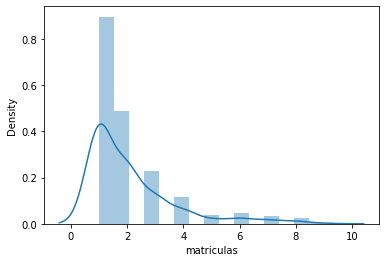

In [354]:
sns.distplot(nomes.matriculas)

In [355]:
nomes.matriculas.value_counts()

1    191
2    104
3     49
4     25
6     10
5      8
7      7
8      5
9      1
Name: matriculas, dtype: int64

In [356]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
34,CRISTIANE,350,@dominioemail.com.br,cristiane@dominioemail.com.br,1
154,NICOLE,182,@dominioemail.com.br,nicole@dominioemail.com.br,7
191,TERESA,264,@dominioemail.com.br,teresa@dominioemail.com.br,3
132,GABRIELE,72,@dominioemail.com.br,gabriele@dominioemail.com.br,6
110,LUCIENE,22,@dominioemail.com.br,luciene@dominioemail.com.br,1


# SELECIONANDO CURSOS

In [357]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
13,BRUNA,34,@servicodoemail.com,bruna@servicodoemail.com,1
76,CRISTIANO,154,@servicodoemail.com,cristiano@servicodoemail.com,3
4,CARLOS,230,@servicodoemail.com,carlos@servicodoemail.com,1
11,GABRIEL,219,@servicodoemail.com,gabriel@servicodoemail.com,2
82,SOLANGE,7,@dominioemail.com.br,solange@dominioemail.com.br,2


In [358]:
todas_matriculas = []
x = np.random.rand(20) # calcula os 20 cursos
prob = x / sum(x)


In [359]:
# busca no dataframe em cada linha

for index, row in nomes.iterrows():
  id = row.id_aluno
  matriculas = row.matriculas
  for i in range(matriculas):
    mat = [id, np.random.choice(cursos.index, p = prob)]
    todas_matriculas.append(mat)

matriculas = pd.DataFrame(todas_matriculas, columns = ['id_aluno', 'id_curso'])

In [360]:
matriculas.head()

,id_aluno,id_curso
0,235,1
1,235,1
2,235,15
3,43,2
4,304,1


In [365]:
matriculas.groupby('id_curso').count().join(cursos['Nome do curso']).rename(columns={'id_aluno':'quantidade_de_alunos'})

,quantidade_de_alunos,Nome do curso
id_curso,,
1,94,Lógica de programação
2,65,Java para Web
3,57,C# para Web
4,51,Ruby on Rails
5,6,Cursos de Python
6,32,PHP com MySql
7,11,.NET para web
8,59,Novas integrações com Java
9,8,TDD com Java


In [366]:
# os numeros do meio mostra a quantidade de pessoas matgriculadas no curso


In [ ]:
#verificando as tabelas

In [ ]:
nomes.sample(5)

In [ ]:
cursos.sample(5)

In [ ]:
cursos.head()

In [ ]:
matriculas.head()

In [ ]:
# jgando o dataFrame em uma variavel:

In [ ]:
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['curso']).rename(columns={'id_aluno':'quantidade_de_alunos'})

In [ ]:
matriculas_por_curso.head()

# SAIDA EM DIFERENTES FORMATOS

In [ ]:
matriculas_por_curso.head()

In [ ]:
matriculas_por_curso.to_csv('matriculas_por_curso.csv', index=False)

In [ ]:
pd.read_csv('matriculas_por_curso.csv')

In [ ]:
matriculas_json = matriculas_por_curso.to_json()
matriculas_json

In [ ]:
matriculas_html = matriculas_por_curso.to_html()
matriculas_html

In [ ]:
print(matriculas_html)

# Criando o Banco SQL

In [ ]:
!pip install sqlalchemy

In [ ]:
from sqlalchemy import create_engine, MetaData, Table

In [ ]:
engine = create_engine('sqlite:///:memory:')

In [ ]:
engine

In [ ]:
type(engine)

In [ ]:
matriculas_por_curso.head(3)

In [ ]:
matriculas_por_curso.to_sql('matriculas', engine)

In [ ]:
print(engine.table_names())

#BUSCANDO DO BANCO SQL

In [ ]:
query = 'select * from matriculas where quantidade_de_alunos < 20'

In [ ]:
pd.read_sql(query, engine)

In [ ]:
# ou

In [367]:
muitas_matriculas = pd.read_sql_table('matriculas', engine, columns=['Nome do curso', 'quantidade_de_alunos'])

In [368]:
muitas_matriculas = pd.read_sql_table('matriculas', engine, columns=['Nome do curso', 'quantidade_de_alunos'])


In [369]:
muitas_matriculas

,Nome do curso,quantidade_de_alunos
0,Lógica de programação,94
1,Java para Web,65
2,C# para Web,57
3,Ruby on Rails,51
4,Cursos de Python,6
5,PHP com MySql,32
6,.NET para web,11
7,Novas integrações com Java,59
8,TDD com Java,8
9,Código limpo com C#,48


In [370]:
muitas_matriculas.query('quantidade_de_alunos > 80')

,Nome do curso,quantidade_de_alunos
0,Lógica de programação,94
17,Programação funcional,92


In [371]:
muitas_matriculas =  muitas_matriculas.query('quantidade_de_alunos > 80')

In [372]:
muitas_matriculas

,Nome do curso,quantidade_de_alunos
0,Lógica de programação,94
17,Programação funcional,92


#ESCREVENDO NO BANCO

In [373]:
muitas_matriculas.to_sql('muitas_matriculas', con=engine)

ValueError: ignored

In [374]:
print(engine.table_names())

['matriculas', 'muitas_matriculas']


# NOMES DOS ALUNOS DA PROXIMA TURMA

In [375]:
matriculas_por_curso.head()

,quantidade_de_alunos,Nome do curso
id_curso,,
1,94,Lógica de programação
2,65,Java para Web
3,57,C# para Web
4,51,Ruby on Rails
5,6,Cursos de Python


In [376]:
matriculas

,id_aluno,id_curso
0,235,1
1,235,1
2,235,15
3,43,2
4,304,1
...,...,...
839,383,3
840,383,18
841,383,18
842,383,12


In [377]:
id_curso = 16
proxima_turma = matriculas.query("id_curso == {}".format(id_curso))
proxima_turma

,id_aluno,id_curso
35,10,16
107,233,16
109,281,16
157,203,16
181,381,16
244,289,16
387,137,16
457,321,16
485,322,16
521,384,16


In [ ]:
# juntar duas tabelas com nomes e a id

In [378]:
nomes.sample()

,nome,id_aluno,dominio,email,matriculas
80,TAIS,179,@dominioemail.com.br,tais@dominioemail.com.br,1


In [379]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))


,id_curso,nome,dominio,email,matriculas
id_aluno,,,,,
10,16,MARIANA,@servicodoemail.com,mariana@servicodoemail.com,2
233,16,ELAINE,@servicodoemail.com,elaine@servicodoemail.com,1
281,16,REGINA,@dominioemail.com.br,regina@dominioemail.com.br,5
203,16,TATIANE,@dominioemail.com.br,tatiane@dominioemail.com.br,5
381,16,CRISTINA,@dominioemail.com.br,cristina@dominioemail.com.br,3
289,16,IVONE,@servicodoemail.com,ivone@servicodoemail.com,1
137,16,DALVA,@dominioemail.com.br,dalva@dominioemail.com.br,3
321,16,FERNANDO,@dominioemail.com.br,fernando@dominioemail.com.br,6
322,16,MARCIO,@dominioemail.com.br,marcio@dominioemail.com.br,4


In [ ]:
# tirar os campos desnecessarios

In [380]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome']


id_aluno
10       MARIANA
233       ELAINE
281       REGINA
203      TATIANE
381     CRISTINA
289        IVONE
137        DALVA
321     FERNANDO
322       MARCIO
384       RENATO
337         ALEX
154    CRISTIANO
66          LUAN
15        VAGNER
44       NICOLAS
271       NILTON
376      AUGUSTO
159      ORLANDO
147     VINICIOS
351      EMANUEL
362      NIVALDO
Name: nome, dtype: object

In [381]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

,nome
id_aluno,
10,MARIANA
233,ELAINE
281,REGINA
203,TATIANE
381,CRISTINA
289,IVONE
137,DALVA
321,FERNANDO
322,MARCIO


In [382]:
nome_curso = cursos.loc[id_curso]
nome_curso

Nome do curso    Estatística básica
Name: 16, dtype: object

In [387]:
nome_curso = nome_curso
nome_curso

Nome do curso    Estatística básica
Name: 16, dtype: object

In [388]:
proxima_turma = proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

In [389]:
proxima_turma

,nome
id_aluno,
10,MARIANA
233,ELAINE
281,REGINA
203,TATIANE
381,CRISTINA
289,IVONE
137,DALVA
321,FERNANDO
322,MARCIO


In [390]:
proxima_turma = proxima_turma.rename(columns = {'nome' : 'Alunos do curso de {}'.format(nome_curso)})

In [391]:
proxima_turma.head(5)

,"Alunos do curso de Nome do curso Estatística básica\nName: 16, dtype: object"
id_aluno,
10,MARIANA
233,ELAINE
281,REGINA
203,TATIANE
381,CRISTINA


#EXCEL

In [392]:
proxima_turma.to_excel('proxima_turma.xlsx', index=False) # sem o index -> false